<a href="https://colab.research.google.com/github/Prestha02/Amazon-Review-Analysis-Week2/blob/main/Week3tech405assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load and Process Image**

Category: Karacadag


<Figure size 1000x1000 with 0 Axes>

Category: Basmati


<Figure size 1000x1000 with 0 Axes>

Category: Arborio


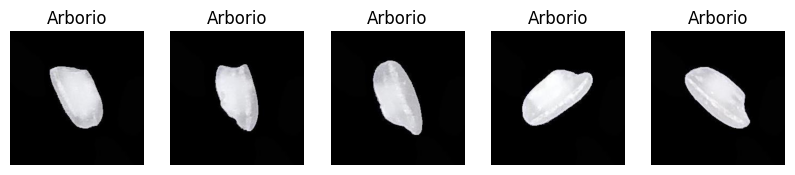

Category: Ipsala


<Figure size 1000x1000 with 0 Axes>

Category: Jasmine


<Figure size 1000x1000 with 0 Axes>

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your dataset
dataset_path = '/content/drive/MyDrive/Rice_Image_Dataset'

# List some categories to view, assuming each category is a subfolder
categories = os.listdir(dataset_path)

# Display some images from each category
def display_images_from_category(category, num_images=5):
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)[:num_images]

    plt.figure(figsize=(10, 10))
    for i, image_name in enumerate(images):
        img_path = os.path.join(category_path, image_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')

for category in categories:
    print(f"Category: {category}")
    display_images_from_category(category)
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Category: Karacadag


<Figure size 1500x500 with 0 Axes>

Category: Basmati


<Figure size 1500x500 with 0 Axes>

Category: Arborio


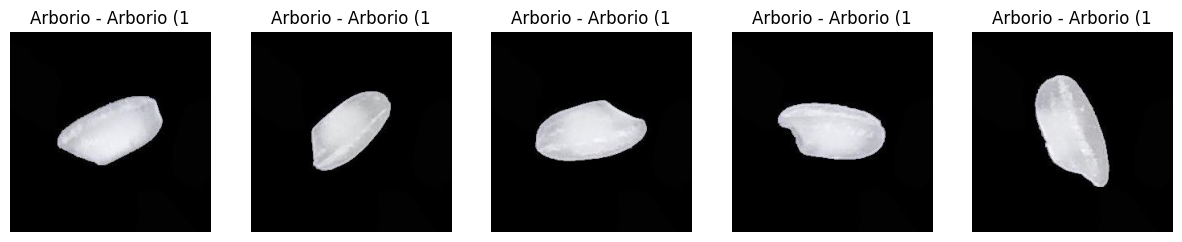

Category: Ipsala


<Figure size 1500x500 with 0 Axes>

Category: Jasmine


<Figure size 1500x500 with 0 Axes>

Category: Basmati.keras
Skipping Basmati.keras as it is not a directory.


In [31]:
# prompt: data visuilzation

from google.colab import drive
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

drive.mount('/content/drive')

# **Load and Process Image**

# Path to your dataset
dataset_path = '/content/drive/MyDrive/Rice_Image_Dataset'

# List some categories to view, assuming each category is a subfolder
categories = os.listdir(dataset_path)

# Function to display a random sample of images from each category
def display_random_images_from_category(category, num_images=5):
    category_path = os.path.join(dataset_path, category)
    # Check if the path is a directory before proceeding
    if os.path.isdir(category_path):
        images = os.listdir(category_path)

        # Select random images
        random_images = random.sample(images, min(num_images, len(images)))

        plt.figure(figsize=(15, 5))  # Adjust figure size for better visualization
        for i, image_name in enumerate(random_images):
            img_path = os.path.join(category_path, image_name)
            try:  # Error handling for potentially corrupt images
                img = mpimg.imread(img_path)
                plt.subplot(1, num_images, i+1)
                plt.imshow(img)
                plt.title(f"{category} - {image_name[:10]}")  # Show shortened image name
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {image_name}: {e}")
                plt.subplot(1, num_images, i+1)
                plt.text(0.5, 0.5, f"Error: {e}", ha='center', va='center')
                plt.axis('off')
    else:
        print(f"Skipping {category} as it is not a directory.")  # Inform the user

# Display random images for each category
for category in categories:
    print(f"Category: {category}")
    display_random_images_from_category(category)
    plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the image data generator with augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to match model input
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Initialize the image data generator with augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to match model input
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16 images belonging to 5 classes.
Found 4 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 4 images belonging to 5 classes.


**Building Model and Training a Model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

def create_model(layers, activation, pooling):
    model = Sequential()

    for layer in layers:
        model.add(Conv2D(layer[0], (3, 3), activation=activation, input_shape=(150, 150, 3)))
        model.add(pooling)

    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(5, activation='softmax'))  # Changed from 3 to 5 to match the number of classes in the dataset

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Example configuration
layers_config = [(32,), (64,)]
activation_func = 'relu'
pooling_type = MaxPooling2D(pool_size=(2, 2))

model = create_model(layers_config, activation_func, pooling_type)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 1.5513 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 8.1658e-06
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step - accuracy: 1.0000 - loss: 1.1183e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - accuracy: 1.0000 - loss: 2.9802e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0

In [28]:
# List of configurations to test
layer_configs = [[(32,), (64,)], [(64,), (128,)]]
activation_functions = ['relu', 'sigmoid']
pooling_types = [MaxPooling2D(pool_size=(2, 2)), AveragePooling2D(pool_size=(2, 2))]

# Dictionary to store results
results = {}

for layers in layer_configs:
    for activation in activation_functions:
        for pooling in pooling_types:
            print(f"Testing configuration: Layers={layers}, Activation={activation}, Pooling={type(pooling).__name__}")

            model = create_model(layers, activation, pooling)
            history = model.fit(
                train_generator,
                steps_per_epoch=train_generator.samples // train_generator.batch_size,
                epochs=5,  # Shorter epochs for testing
                validation_data=validation_generator,
                validation_steps=validation_generator.samples // validation_generator.batch_size
            )

            # Evaluate the model and store results
            val_loss, val_accuracy = model.evaluate(validation_generator)
            results[(str(layers), activation, type(pooling).__name__)] = val_accuracy
            print(f"Validation Accuracy: {val_accuracy}")

# Display and analyze the results
print("Configuration Results:")
for config, accuracy in results.items():
    print(f"{config}: {accuracy}")


Testing configuration: Layers=[(32,), (64,)], Activation=relu, Pooling=MaxPooling2D
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.7653 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 1.5332e-04
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.8816e-04 - val_accuracy: 1.0000 - val_loss: 3.6955e-06
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 5.3718e-06 - val_accuracy: 1.0000 - val_loss: 8.9407e-08
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 2.1607e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.0
Testing configuration: Layers=[(32,), (64,)], Activation=relu, Pooling=AveragePooling2D
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1875 - loss: 1.5996 - val

**Document the results**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 1.0000 - loss: 0.0012
Validation Loss: 0.001210195361636579
Validation Accuracy: 1.0


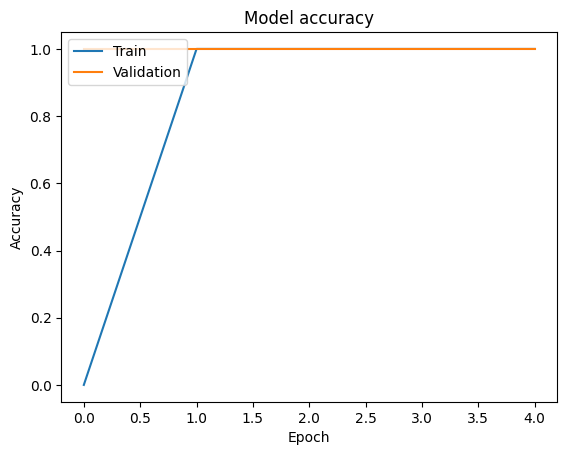

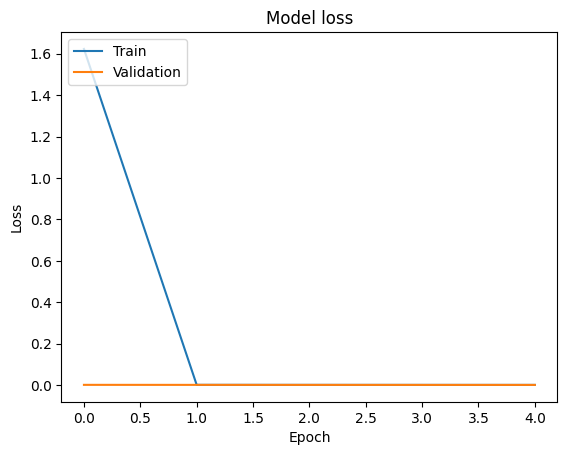

In [29]:
def document_results(model, history):
    # Evaluate the model on the validation set
    validation_loss, validation_accuracy = model.evaluate(validation_generator)
    print(f"Validation Loss: {validation_loss}")
    print(f"Validation Accuracy: {validation_accuracy}")

    model.save('/content/drive/MyDrive/Rice_Image_Dataset/Basmati.keras')

    # Plot training and validation accuracy
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming 'model' and 'history' are available from previous code execution
document_results(model, history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Unique values in y_true: [0]
Shape of y_pred: (4, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


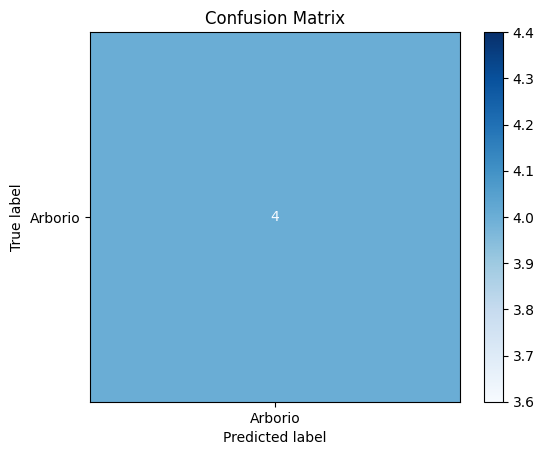

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming predictions and labels are available
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Check the unique values in y_true to understand if it includes all the labels
print("Unique values in y_true:", np.unique(y_true))

# Check the shape of y_pred and make sure it aligns with the number of classes
print("Shape of y_pred:", y_pred.shape)

# Get a list of all class labels from the generator
class_labels = list(validation_generator.class_indices.keys())

# ----- Modification to fix the error -----
# Filter class_labels to match the unique values in y_true
present_labels = np.unique(y_true)
class_labels = [class_labels[i] for i in present_labels]
# -----------------------------------------

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()